In [1]:
import pandas as pd
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# Using iris data --Continuous data

In [2]:
iris=pd.read_csv("iris_dataset.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X=iris.iloc[:,:4] #considering only 1st 4 columns: independent variables

Y=iris[['Species']] #dependent variable
X.shape

(150, 4)

In [4]:
#Splitting X&y into training & test sets:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [5]:
X_train.shape

(120, 4)

In [6]:
#Training the model with test data:

gb=GaussianNB()
gb.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
#Prediction on test set:
Y_pred=gb.predict(X_test)

In [8]:
print("Accuracy in %: " , metrics.accuracy_score(Y_test, Y_pred)*100)

Accuracy in %:  96.66666666666667


In [9]:
cm=confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


# Using Adult data: Kaggle --Discrete data

In [10]:
adult=pd.read_csv("adult.csv")
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
from sklearn import preprocessing

#cleaning & pre-processing:

le=preprocessing.LabelEncoder()
for column in adult.columns:
    if adult[column].dtype==type(object):
        adult[column]=le.fit_transform(adult[column])
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


In [12]:
adult.shape


(32561, 15)

In [13]:
X=adult.iloc[:,:-1]
X.shape

(32561, 14)

In [14]:
Y=adult['income']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [16]:
gb=MultinomialNB() #for discrete data
#gb=GaussianNB() #for continuous data
#gb=BernoulliNB() #for binomial data

In [17]:
print("Start tarining...") #optional for time consumed in prediction by model
tStart=time()
gb.fit(X_train, Y_train)
print("Training time: ",round(time() -tStart, 3),"s")

#making predictions on the testing set:

Y_pred=gb.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred)*100)

Start tarining...
Training time:  0.062 s
Accuracy:  78.81160755412252


In [18]:
cm=confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[4749  217]
 [1163  384]]


# ROC Curve

In [19]:
probs=gb.predict_proba(X_test)
probs

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [6.23732292e-24, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00]])

In [20]:
#Keep probability of positive rate:

prob_positive=probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_test, prob_positive)
roc_auc=metrics.auc(fpr, tpr)
print("area under the curve", roc_auc)

area under the curve 0.6058733974087792


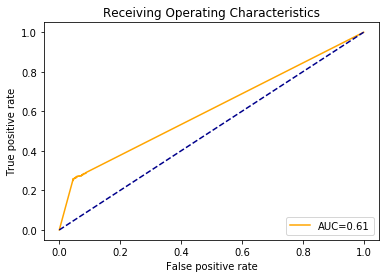

In [21]:
plt.title("Receiving Operating Characteristics")
plt.plot(fpr, tpr, 'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()